In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("training_data.csv")

# Map labels to integers if needed
df['increase_stock_label'] = df['increase_stock'].map({
    "low_bike_demand": 0,
    "high_bike_demand": 1
})



class MajorityClassifier:
    def fit(self, y):
        values, counts = np.unique(y, return_counts=True)
        self.majority_class = values[np.argmax(counts)]
    
    def predict(self, X):
        return np.full(len(X), self.majority_class)



/var/folders/57/fxsf5p3x4vzbtlptwzwnz9240000gn/T/ipykernel_69885/2453934195.py:16: RuntimeWarning: invalid value encountered in divide
  ratio = count / total


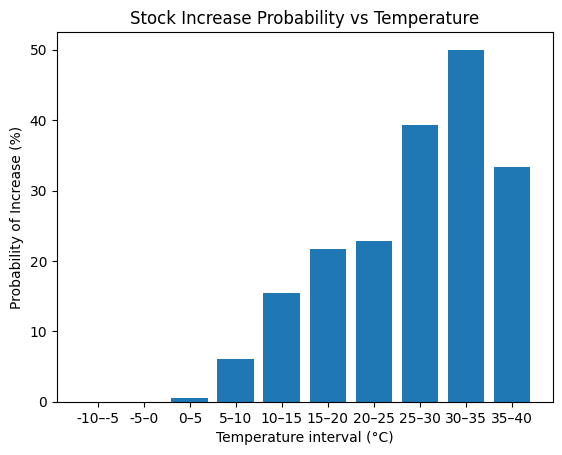

In [21]:
import numpy as np
import matplotlib.pyplot as plt

temp = df["temp"].values
y = df["increase_stock_label"].values  # 0 or 1

bins = np.array([-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])  # choose freely
bin_idx = np.digitize(temp, bins) - 1
total = np.zeros(len(bins) - 1)
count = np.zeros(len(bins) - 1)

for i in range(len(temp)):
    if 0 <= bin_idx[i] < len(total):
        total[bin_idx[i]] += 1
        count[bin_idx[i]] += y[i]
ratio = count / total

bin_labels = [f"{bins[i]}–{bins[i+1]}" for i in range(len(bins) - 1)]

plt.bar(bin_labels, ratio * 100)
plt.ylabel("Probability of Increase (%)")
plt.xlabel("Temperature interval (°C)")
plt.title("Stock Increase Probability vs Temperature")
plt.show()


In [24]:
import pandas as pd
df = pd.read_csv("training_data.csv")

# Map labels to integers if needed
df['increase_stock_label'] = df['increase_stock'].map({
    "low_bike_demand": 0,
    "high_bike_demand": 1
})

y = df['increase_stock_label']

df["month"] = df["month"] -1
X = df.drop(columns=["increase_stock", "increase_stock_label"])

def load_data():
    return X, y

from sklearn.model_selection import train_test_split


def prepare_data(y, X):
    return train_test_split(
        X,
        y,
        test_size=0.2,      # 20% test data
        random_state=42,    # makes results reproducible
        stratify=y          # keeps class distribution balanced
    )

X, y = load_data()
X_train, X_test, y_train, y_test = prepare_data(y, X)



In [25]:
import numpy as np

class MajorityClassifier:
    def fit(self, X_train, y):
        # Find most frequent class
        values, counts = np.unique(y, return_counts=True)
        self.majority_class = values[np.argmax(counts)]
    
    def predict(self, X):
        # Predict majority class for all samples
        return np.full(len(X), self.majority_class)
    
majority = MajorityClassifier()


majority.fit(X_train, y_train)

majority_predict = majority.predict(X_test)


In [26]:
from sklearn.dummy import DummyClassifier

sk_clf = DummyClassifier(strategy="most_frequent")
sk_clf.fit(X_train, y_train)

y_pred_sklearn = sk_clf.predict(X_test)
y_pred_sklearn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, majority_predict)

0.81875

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)  # increase iterations to avoid convergence issues

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#X_tran_preprocessed = X_train[["hour_of_day", "humidity", "temp"]]
#X_test_preprocessed = X_test[["hour_of_day", "humidity", "temp"]]

log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

accuracy_score(y_test, y_pred_log)

/Users/tlindberg/Desktop/smask/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/tlindberg/Desktop/smask/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/tlindberg/Desktop/smask/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/tlindberg/Desktop/smask/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/tlindberg/Desktop/smask/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_fea

0.86875